In [0]:
#three things I'll do here: 
#classifying movie reviws as positive or negative (binary classification)
#classifying news wires by topic (multi-class classification)
#estimating the price of a house, given real-estate data (regression)

In [0]:
!pip install -q tensorflow==2.0.0-alpha0
import tensorflow as tf 


In [118]:
!pip install numpy==1.16.1
import numpy as np

In [0]:
import numpy as np 
import scipy as sc

In [0]:
layers = tf.keras.layers
mnist = tf.keras.datasets.mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
models = tf.keras.models
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(10, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [0]:
optimizers = tf.keras.optimizers

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='mse',
             metrics=['accuracy'])https://bit.ly/2WCvgas

In [0]:
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1]* train_images.shape[2]).astype('float32')/255

In [0]:
to_categorical = tf.keras.utils.to_categorical

In [0]:
train_labels = to_categorical(train_labels)

In [13]:
model.fit(train_images, train_labels, batch_size=32, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0235 - accuracy: 0.8472
Epoch 2/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0136 - accuracy: 0.9122
Epoch 3/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0122 - accuracy: 0.9211
Epoch 4/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0115 - accuracy: 0.9250
Epoch 5/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0110 - accuracy: 0.9289
Epoch 6/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0106 - accuracy: 0.9316
Epoch 7/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0104 - accuracy: 0.9334
Epoch 8/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0101 - accuracy: 0.9357
Epoch 9/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0099 - accuracy: 0.9362
Epoch 10/10
60000/60000 [============

In [0]:
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_lables) = imdb.load_data(num_words = 10000)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
def vectorize_sequences(sequences, dimensions =10000):
  results = np.zeros((len(sequences), dimensions)) #creates an all zero matric of shape 
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_lables).astype('float32')

In [0]:
y_train = np.asarray(y_train).astype('float32')

In [0]:
y_test = np.asarray(y_test).astype('float32')

In [0]:
models = tf.keras.models
layers = tf.keras.layers
model = models.Sequential() #why do we need to define a sequential model type here? 

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
losses = tf.keras.losses
metrics = tf.keras.metrics
optimizers = tf.keras.optimizers


In [0]:
#separate a validation set of 10k samples
x_val = x_train[:10000]
y_val = y_train[:10000]
x_train_partial = x_train[10000:]
y_train_partial = y_train[10000:]

In [189]:
history = model.fit(x_train_partial, y_train_partial, epochs=5, batch_size=28, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 6s 369us/sample - loss: 0.3441 - accuracy: 0.8602 - val_loss: 0.3431 - val_accuracy: 0.8601
Epoch 2/5
15000/15000 [==============================] - 5s 350us/sample - loss: 0.2053 - accuracy: 0.9216 - val_loss: 0.2843 - val_accuracy: 0.8877
Epoch 3/5
15000/15000 [==============================] - 5s 355us/sample - loss: 0.1621 - accuracy: 0.9383 - val_loss: 0.3103 - val_accuracy: 0.8851
Epoch 4/5
15000/15000 [==============================] - 6s 378us/sample - loss: 0.1335 - accuracy: 0.9521 - val_loss: 0.3526 - val_accuracy: 0.8798
Epoch 5/5
15000/15000 [==============================] - 5s 337us/sample - loss: 0.1124 - accuracy: 0.9604 - val_loss: 0.3769 - val_accuracy: 0.8795


In [203]:
#this is for test, no need to run this one
model2 = models.Sequential() #why do we need to define a sequential model type here? 

model2.add(layers.Dense(100, activation='tanh', input_shape=(10000,)))
#model2.add(layers.Dense(32, activation='tanh'))
model2.add(layers.Dense(25, activation='tanh'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', metrics=['acc'], loss = 'mse')
history2 = model2.fit(x_train_partial, y_train_partial, epochs=4, batch_size=64, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 17s 1ms/sample - loss: 0.1074 - acc: 0.8482 - val_loss: 0.0873 - val_acc: 0.8778
Epoch 2/4
15000/15000 [==============================] - 17s 1ms/sample - loss: 0.0564 - acc: 0.9260 - val_loss: 0.0885 - val_acc: 0.8824
Epoch 3/4
15000/15000 [==============================] - 16s 1ms/sample - loss: 0.0406 - acc: 0.9466 - val_loss: 0.0941 - val_acc: 0.8780
Epoch 4/4
15000/15000 [==============================] - 17s 1ms/sample - loss: 0.0296 - acc: 0.9631 - val_loss: 0.1061 - val_acc: 0.8657


In [0]:
history_dict = history.history
history_dict2 = history2.history

In [0]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

In [172]:
history_dict2.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [0]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
acc2 = history_dict2['acc']
val_acc2 = history_dict2['val_acc']

In [0]:
epochs = range(1, len(acc)+1)

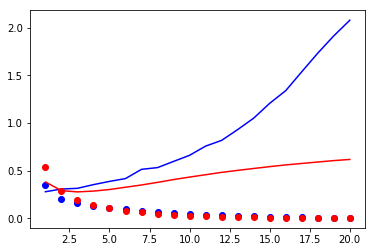

In [166]:
plt.clf()
plt.plot(epochs, val_loss_values, 'b', label='Validation_loss')
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, loss_values2, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values2, 'r', label='Validation_Loss')


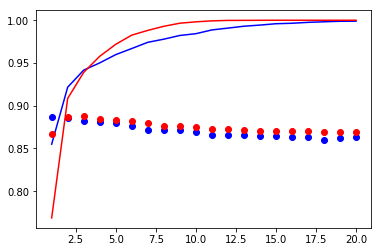

In [180]:
plt.plot(epochs, acc, 'b')
plt.plot(epochs, val_acc, 'bo')
plt.plot(epochs, acc2, 'r')
plt.plot(epochs, val_acc2, 'ro')

In [190]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 121us/sample - loss: 0.4080 - accuracy: 0.8654


In [197]:
results2 = model2.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 127us/sample - loss: 0.3341 - acc: 0.8734


In [195]:
results3 = model2.evaluate(x_test, y_test)

25000/25000 [==============================] - 5s 193us/sample - loss: 0.3218 - acc: 0.8766


In [192]:
model.predict(x_test)

array([[0.13209671],
       [0.99999547],
       [0.994397  ],
       ...,
       [0.0529477 ],
       [0.03041816],
       [0.47946468]], dtype=float32)

In [193]:
model2.predict(x_test)

array([[0.24758795],
       [0.999691  ],
       [0.95707405],
       ...,
       [0.11489442],
       [0.19282195],
       [0.53046036]], dtype=float32)

In [0]:
#starting example 3.5 onwards

In [205]:
from keras.datasets import reuters

Using TensorFlow backend.


In [0]:
retuers = tf.keras.datasets.reuters

In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3, '?') for i in train_data[5]])

In [218]:
decoded_newswire

"the in has would seven time 35 we're but 18 national adjusted with growth received vs been reuter growth received vs been have five 1 35 exchange farm same with did dlr vs been reuter did dlr vs have five so but 18 premiums program their cts voting with 23 standard vs been reuter 23 standard vs been have five their a exchange farm cts 35 with did offering vs been reuter did offering vs have five so national 13 a but 18 or levels with shareholders raised vs been reuter sources raised vs been have five 13 a exchange farm or 35 with any businesses vs been reuter any addition vs have five pct dlrs"

In [0]:
def vectorize_sequences(sequence, dimensions=10000):
  results = np.zeros((len(sequence),dimensions))
  for idx, item in enumerate(sequence):
    results[idx, item] = 1.
  return results

In [0]:
train_x = vectorize_sequences(train_data, dimensions=10000)
train_y = vectorize_sequences(train_labels, dimensions=46)

test_x = vectorize_sequences(test_data, dimensions=10000)
test_y = vectorize_sequences(test_labels, dimensions=46)

In [309]:
to_categorical = tf.keras.utils.to_categorical
test_y


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
#tryin another sequential model 
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])


In [326]:
history = model.fit(train_x[:7000], train_y[:7000], epochs=20, batch_size=32, validation_data = (train_x[7000:], train_y[7000:]))

Train on 7000 samples, validate on 1982 samples
Epoch 1/20
7000/7000 [==============================] - 4s 533us/sample - loss: 0.1655 - acc: 0.9583 - val_loss: 1.3923 - val_acc: 0.7649
Epoch 2/20
7000/7000 [==============================] - 3s 484us/sample - loss: 0.1473 - acc: 0.9601 - val_loss: 1.2733 - val_acc: 0.7866
Epoch 3/20
7000/7000 [==============================] - 3s 498us/sample - loss: 0.1333 - acc: 0.9614 - val_loss: 1.3038 - val_acc: 0.7911
Epoch 4/20
7000/7000 [==============================] - 3s 488us/sample - loss: 0.1393 - acc: 0.9613 - val_loss: 1.3880 - val_acc: 0.7856
Epoch 5/20
7000/7000 [==============================] - 3s 480us/sample - loss: 0.1303 - acc: 0.9621 - val_loss: 1.4293 - val_acc: 0.7916
Epoch 6/20
7000/7000 [==============================] - 3s 489us/sample - loss: 0.1286 - acc: 0.9626 - val_loss: 1.6399 - val_acc: 0.7699
Epoch 7/20
7000/7000 [==============================] - 3s 489us/sample - loss: 0.1177 - acc: 0.9633 - val_loss: 1.6294 - va

In [335]:

results= model.evaluate(test_x, test_y)

2246/2246 [==============================] - 0s 187us/sample - loss: 3.2761 - acc: 0.7645


In [336]:
model.evaluate(test_x, test_labels_copy)

2246/2246 [==============================] - 0s 156us/sample - loss: 13.7952 - acc: 0.2061


[13.795182802161253, 0.20614426]

In [337]:
test_labels_copy[0].shape

(46,)

In [0]:
import copy 
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)

In [391]:
float(np.sum(hits_array))/len(hits_array)

0.1798753339269813

In [350]:
len(test_y)

2246

In [0]:
a = np.random.randint(2, size=1000)

In [0]:
b= np.random.randint(2, size=1000)

In [0]:
hits = a == b

In [386]:
np.sum(hits) / len(hits)

0.508